In [64]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from IPython.display import clear_output
import time
plt.rcParams.update({'font.size': 16})
def error(phi_a,phi_n):
    # compute error between analytical and numerical numbers

    return (phi_a-phi_n)/phi_a*100

def convert1D_to_2D(A,N,M):
# Convert phi1D to 2D
    A2D = np.zeros((N,M))
    for i in range(N):
        for j in range(M):
            k = (j-1)*N + i
            A2D[i,j]=A[k]

    return A2D


def plot_phi(phi,phi_A,N,method_name,convert=False):

    # If need convert phi from phi[K] to phi[i,j], aka, phi1D to phi2D
    if convert:
        # Analytical solution
        phi2D = np.zeros((N,N))
        # Convert phi1D to 2D
        for i in range(N):
            for j in range(N):
                k = (j-1)*N + i
                phi2D[i,j]=phi[k]
    phi = phi2D

    # Plot        
    x,y = np.meshgrid(np.linspace(0,1,N),np.linspace(0,1,N))
    fig, ax = plt.subplots(figsize=(12,6))
    CS = ax.contour(x,y,phi, levels=np.arange(-30,30,5))
    ax.clabel(CS, inline=True, fontsize=10)
    CB = fig.colorbar(CS)
    ax.set_xlabel('Distance, x')
    ax.set_ylabel('Distance, y')

    ax.set_title('Numerical solution by '+method_name+' iterative solver, code by Congcong Fan')


    fig, ax = plt.subplots(figsize=(12,6))
    ax.set_title('Analytical solution, code by Congcong Fan')

    CS = ax.contour(x,y,phi_A, levels=np.arange(-30,30,5))
    ax.clabel(CS, inline=True, fontsize=10)
    CB = fig.colorbar(CS)
    ax.set_xlabel('Distance, x')
    ax.set_ylabel('Distance, y')


    # Error
    e = error(phi_A,phi)
    fig, ax = plt.subplots(figsize=(12,6))
    CS = ax.contour(e)
    ax.clabel(CS, inline=True, fontsize=10)
    ax.set_title('Errors, code by Congcong Fan')
    # make a colorbar for the contour lines
    CB = fig.colorbar(CS)
    ax.set_xlabel('Distance, x')
    ax.set_ylabel('Distance, y')






# Perform Gauss-Seidel algorithm

In [2]:
# numbering scheme used is k = (j-1)*N + i
start = time.time()
N = 41

L = 1   # length
M = np.zeros((N,N)) # an empty matrix
S = np.zeros((N,N))
phi = np.zeros((N,N))

dx = L/(N-1)    # Grid size
dy = L/(N-1)    # Grid size

tol = 1e-6
aE = 1/dx**2
aW = 1/dx**2
aN = 1/dy**2
aS = 1/dy**2
a0 = -(2/dx**2 + 2/dy**2)


## Right BC
i = N-1 
for j in range(N):

    y = j*dy
    x = i*dx
    phi[i,j] = 0.25*np.sinh(5)+(y-0.5)**2*np.sinh(10*(y-0.5))+np.exp(2*y)

## left BC
i = 0
for j in range(N):
    
    y = j*dy
    x = i*dx
    
    phi[i,j] = 0.25*np.sinh(-5) + (y-0.5)**2*np.sinh(10*(y-0.5))+1

## Bottom BC
j=0
for i in range(N):
    
    x = i*dx
    y = j*dy
    
    phi[i,j] = 0.25*np.sinh(-5) + (x-0.5)**2*np.sinh(10*(x-0.5))+1

## Top BC
j=N-1
for i in range(N):
    
    x = i*dx
    y = j*dy
    
    phi[i,j] = 0.25*np.sinh(5)+(x-0.5)**2*np.sinh(10*(x-0.5))+np.exp(2*x)

for _ in tqdm(range(10000)):

    for i in range(1,N-1):
        
        for j in range(1,N-1):
            
            x = i*dx
            y = j*dy

            S[i,j] = 2*np.sinh(10*(x-0.5)) + 40*(x-0.5)*np.cosh(10*(x-0.5)) + 100*(x-0.5)**2*np.sinh(10*(x-0.5)) + 2*np.sinh(10*(y-0.5)) + 40*(y-0.5)*np.cosh(10*(y-0.5)) + 100*(y-0.5)**2*np.sinh(10*(y-0.5))+4*(x**2+y**2)*np.exp(2*x*y)
            
            phi[i,j] = (S[i,j] - aE*phi[i+1,j] - aW*phi[i-1,j] - aN*phi[i,j+1] - aS*phi[i,j-1]) / a0

    # Calculate residual
    R2 = 0
    R = np.zeros((N,N))
    for i in range(1,N-1):
        
        for j in range(1,N-1):
            R[i,j] = S[i,j] - aE*phi[i+1,j] - aW*phi[i-1,j] - aN*phi[i,j+1] - aS*phi[i,j-1] - a0*phi[i,j]
            R2 = R2+R[i,j]**2

    R2 = np.sqrt(R2)
    if _ %500==0:
        clear_output(True)
        print('Residual:', R2)
        
    if R2<tol:
        print('Converged! Residual: ',R2, 'Time elapsed: ', time.time()-start)
        break


 30%|███       | 3014/10000 [00:45<01:44, 66.92it/s]

Residual: 1.2329210213311063e-05


 34%|███▍      | 3407/10000 [00:51<01:39, 66.24it/s]

Converged! Residual:  9.988058240720717e-07 Time elapsed:  51.44565510749817


Text(0, 0.5, 'Distance, y')

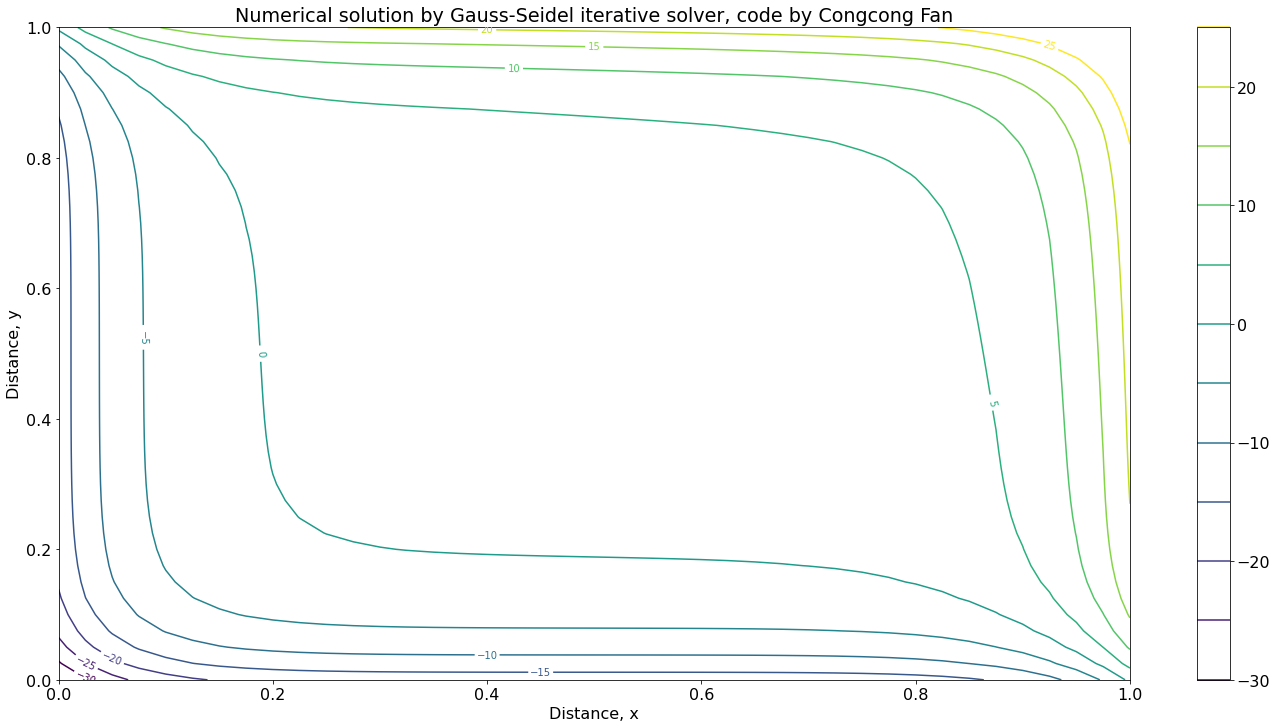

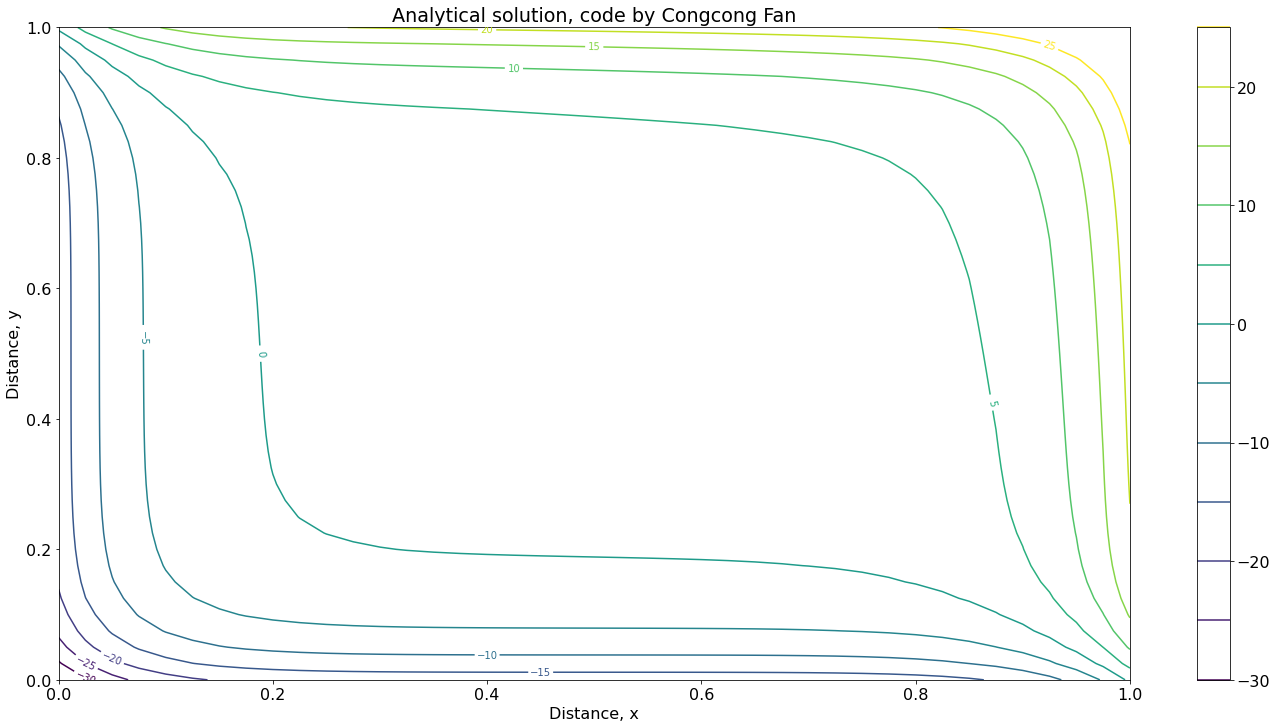

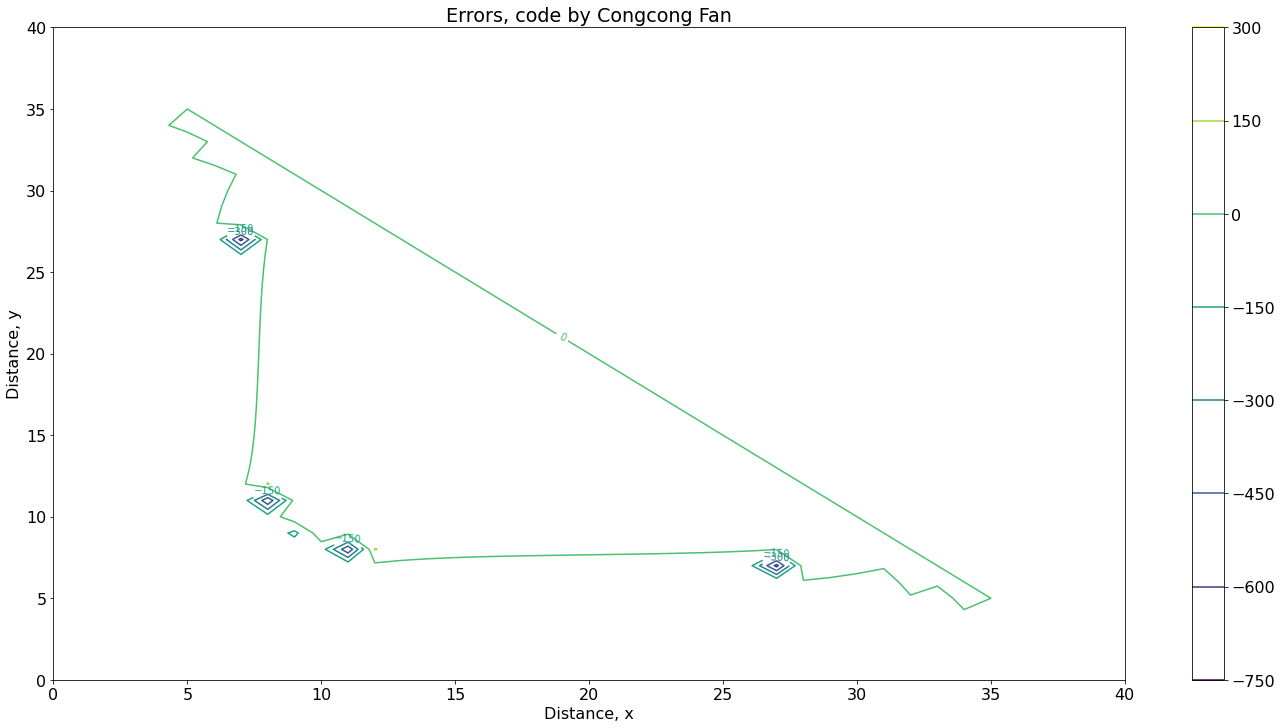

In [17]:
# Analytical solution
x = np.linspace(0,1,N)
y = np.linspace(0,1,N)
phi_A = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        
        phi_A[i,j] = (x[i]-0.5)**2*np.sinh(10*(x[i]-0.5))+(y[j]-0.5)**2*np.sinh(10*(y[j]-0.5))+np.exp(2*x[i]*y[j])

plot_phi(phi, phi_A, N, 'Gauss-Seidel', convert=False)






# Line-by-line method, row-wise. e.g. solve at constant j direction then march in j direction

In [32]:
N=10
for i in range(N-2,-1,-1):
    print(i)

8
7
6
5
4
3
2
1
0


In [41]:
def TRI(N,a,d,c,b):
    # Tridiagonal matrix solver
    phi = np.zeros(N)

    # Forward Elemination
    for i in range (1,N):
        const = a[i-1] / d[i-1]
        d[i] = d[i] - const*c[i-1] # Diagonal
        b[i] = b[i] - const*b[i-1]  # RHS
    
    # Solve last equation 
    phi[-1] = b[-1]/d[-1]

    # Backward Elemination
    for i in range(N-2,-1,-1):
        
        phi[i] = (b[i] - c[i]*phi[i+1]) / d[i]

    return phi

In [42]:
# numbering scheme used is k = (j-1)*N + i
start = time.time()
N = 41

L = 1   # length
M = np.zeros((N,N)) # an empty matrix
phi = np.zeros((N,N))

dx = L/(N-1)    # Grid size
dy = L/(N-1)    # Grid size

tol = 1e-6
c = np.zeros(N-1)
a = np.zeros(N-1)
d = np.zeros(N)
b = np.zeros(N)



aE = 1/dx**2
aW = 1/dx**2
aN = 1/dy**2
aS = 1/dy**2
a0 = -(2/dx**2 + 2/dy**2)


    
## Right BC
i = N-1 
for j in range(1,N-1):

    x = i*dx
    y = j*dy
    phi[i,j] = 0.25*np.sinh(5)+(y-0.5)**2*np.sinh(10*(y-0.5))+np.exp(2*y)

## left BC
i = 0
for j in range(1,N-1):
    
    x = i*dx
    y = j*dy
    
    phi[i,j] = 0.25*np.sinh(-5) + (y-0.5)**2*np.sinh(10*(y-0.5))+1

## Bottom BC
j=0
for i in range(N):
    
    x = i*dx
    y = j*dy
    
    phi[i,j] = 0.25*np.sinh(-5) + (x-0.5)**2*np.sinh(10*(x-0.5))+1

## Top BC
j=N-1
for i in range(N):
    
    x = i*dx
    y = j*dy
    
    phi[i,j] = 0.25*np.sinh(5)+(x-0.5)**2*np.sinh(10*(x-0.5))+np.exp(2*x)

    
for _ in tqdm(range(100000)):
    for j in range(1,N-1):
        d[0] = 1

        # Left BC
        b[0] = phi[0,j]

        for i in range(1,N-1):
            x = i*dx
            y = j*dy
            
            d[i] = -(2/dx**2 + 2/dy**2)
            a[i-1] = 1/dx**2
            c[i] = 1/dx**2

            sij = 2*np.sinh(10*(x-0.5)) + 40*(x-0.5)*np.cosh(10*(x-0.5)) + 100*(x-0.5)**2*np.sinh(10*(x-0.5)) + 2*np.sinh(10*(y-0.5)) + 40*(y-0.5)*np.cosh(10*(y-0.5)) + 100*(y-0.5)**2*np.sinh(10*(y-0.5))+4*(x**2+y**2)*np.exp(2*x*y)
            b[i] = sij - phi[i,j+1]/dy**2 - phi[i,j-1]/dy**2

        d[N-1]=1
        
        # Right BC
        
        b[N-1] = phi[-1,j]
        
        phix = TRI(N,a,d,c,b)

        phi[:,j] = phix
        
    # Calculate residual
    R2 = 0
    R = np.zeros((N,N))
    for i in range(1,N-1):
        
        for j in range(1,N-1):
            x = i*dx
            y = j*dy
            sij = 2*np.sinh(10*(x-0.5)) + 40*(x-0.5)*np.cosh(10*(x-0.5)) + 100*(x-0.5)**2*np.sinh(10*(x-0.5)) + 2*np.sinh(10*(y-0.5)) + 40*(y-0.5)*np.cosh(10*(y-0.5)) + 100*(y-0.5)**2*np.sinh(10*(y-0.5))+4*(x**2+y**2)*np.exp(2*x*y)
            
            R[i,j] = sij - aE*phi[i+1,j] - aW*phi[i-1,j] - aN*phi[i,j+1] - aS*phi[i,j-1] - a0*phi[i,j]
            R2 = R2+R[i,j]**2

    R2 = np.sqrt(R2)
    if _ %500==0:
        clear_output(True)
        print("Residual: ",R2)
        
    if R2<tol:
        print('Converged! Residual: ',R2, 'Time elapsed: ', time.time()-start)
        break



  2%|▏         | 1508/100000 [00:42<45:09, 36.35it/s]

Residual:  1.2696960463191935e-05


  2%|▏         | 1707/100000 [00:47<45:41, 35.86it/s]

Converged! Residual:  9.889876294475393e-07 Time elapsed:  47.607869148254395


Text(0, 0.5, 'Distance, y')

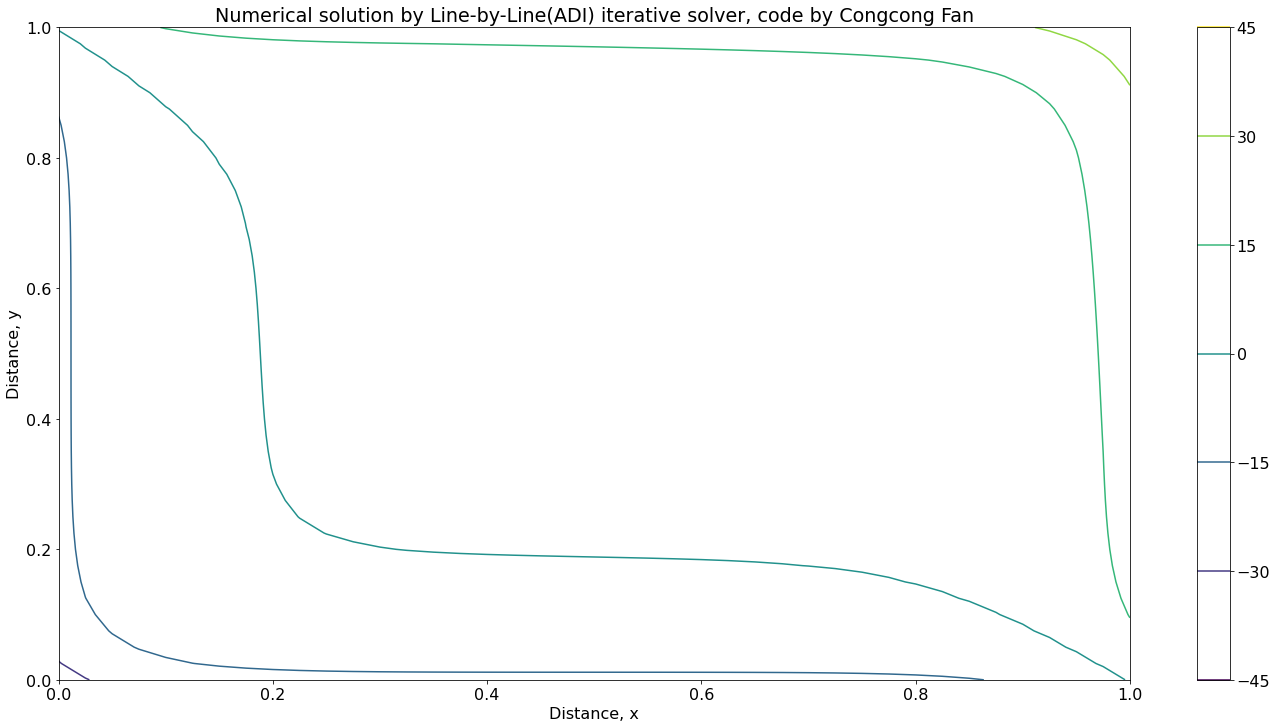

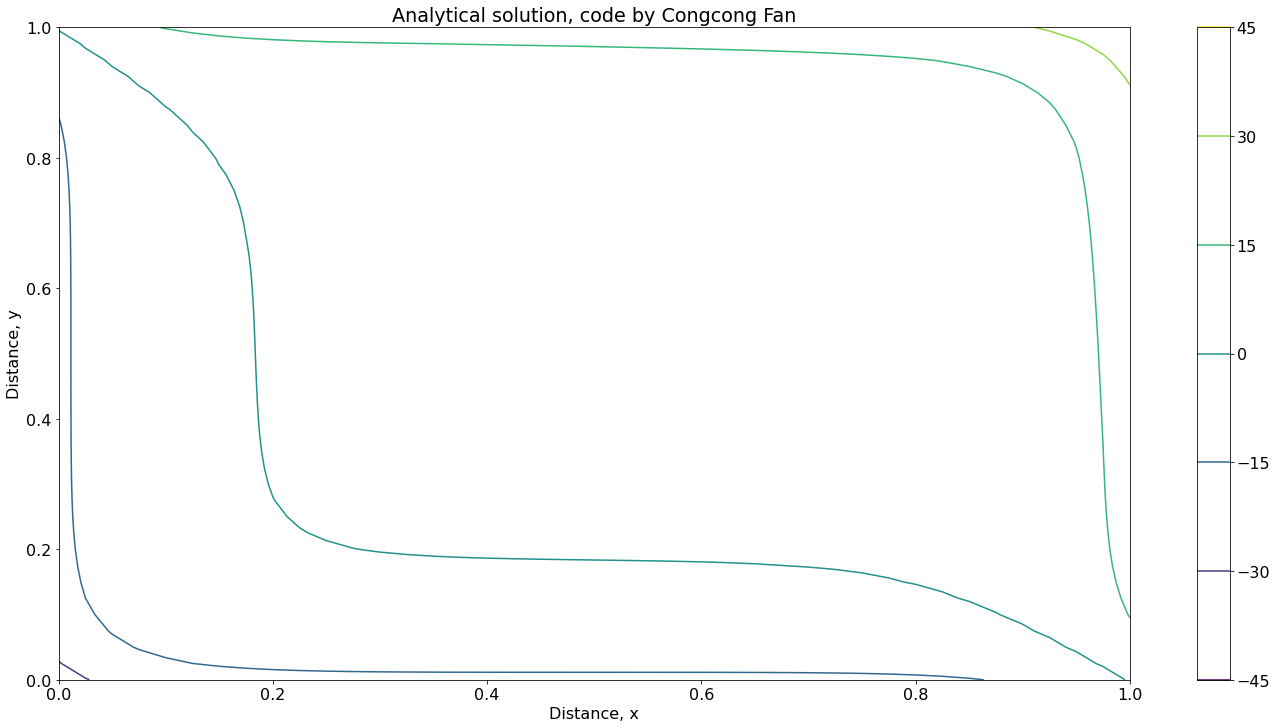

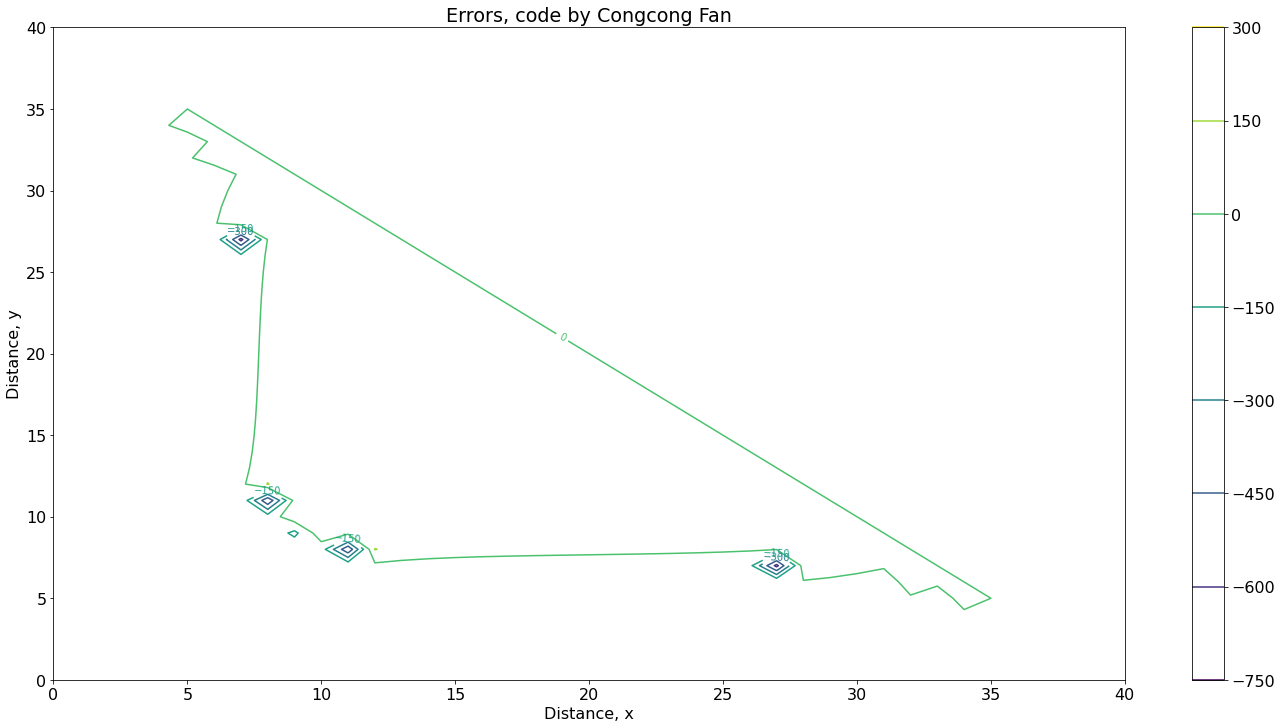

In [43]:
# Analytical solution
x = np.linspace(0,1,N)
y = np.linspace(0,1,N)
phi_A = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        
        phi_A[i,j] = (x[i]-0.5)**2*np.sinh(10*(x[i]-0.5))+(y[j]-0.5)**2*np.sinh(10*(y[j]-0.5))+np.exp(2*x[i]*y[j])

plot_phi(phi, phi_A, N, 'Line-by-Line', convert=False)






# Stone's strongly implicit method
<img src="stones implicit method.png">
<img src="stones code snippet.png">

In [2]:
def stonesmethod(N, K, B, D, E, F, H):
    d, e, c, b, f = np.zeros(K), np.zeros(K), np.zeros(K), np.zeros(K), np.zeros(K)
    # Bbar,Cbar,Dbar,Ebar,Fbar,Gbar,Hbar = np.zeros(N), np.zeros(N), np.zeros(N), np.zeros(N), np.zeros(N), np.zeros(N), np.zeros(N)
    alpha = 0.8

    # Step 3
    d[0] = E[0]
    e[0] = F[0] / d[0]
    f[0] = H[0] / d[0]

    for k in range(1, K):
        if k > N:
            b[k] = B[k] / (1 + alpha * e[k - N])
        # print(k, K, c.shape)
        c[k] = D[k] / (1 + alpha * f[k - 1])

        if k > N:
            d[k] = E[k] + alpha * (b[k] * e[k - N] + c[k] * f[k - 1]) - b[k] * f[k - N] - c[k] * e[k - 1]
        else:
            d[k] = E[k] + alpha * (c[k] * f[k - 1]) - c[k] * e[k - 1]

        f[k] = (H[k] - alpha * c[k] * f[k - 1]) / d[k]

        if k > N:
            e[k] = (F[k] - alpha * b[k] * e[k - N]) / d[k]

        else:
            e[k] = F[k] / d[k]

    return b, c, d, e, f

In [29]:
def matrixA(N):
    A = np.zeros((N ** 2, N ** 2))

    ## Right BC
    i = N - 1
    for j in range(N):
        x = i * dx
        y = j * dy

        k = (j - 1) * N + i
        A[k, k] = 1

    ## left BC
    i = 0
    for j in range(N):
        x = i * dx
        y = j * dy
        k = (j - 1) * N + i
        A[k, k] = 1
    ## Bottom BC
    j = 0
    for i in range(N):
        x = i * dx
        y = j * dy
        k = (j - 1) * N + i
        A[k, k] = 1
    ## Top BC
    j = N - 1
    for i in range(N):
        x = i * dx
        y = j * dy
        k = (j - 1) * N + i
        A[k, k] = 1

    for i in range(1, N - 1):

        for j in range(1, N - 1):
            k = (j - 1) * N + i
            A[k, k] = -2 / dx ** 2 - 2 / dy ** 2
            A[k, k - 1] = 1 / dx ** 2
            A[k, k + 1] = 1 / dx ** 2

            A[k, k - N] = 1 / dy ** 2
            A[k, k + N] = 1 / dy ** 2

    return A

In [30]:
start = time.time()
N = 41
L = 1  # length
phi = np.zeros((N ** 2))
S = np.zeros((N ** 2))

dx = L / (N - 1)  # Grid size
dy = L / (N - 1)  # Grid size

tol = 1e-6

aE = 1 / dx ** 2
aW = 1 / dx ** 2
aN = 1 / dy ** 2
aS = 1 / dy ** 2
a0 = -(2 / dx ** 2 + 2 / dy ** 2)

L = np.zeros((N ** 2, N ** 2))
U = np.zeros((N ** 2, N ** 2))

# RHS source terms

for i in range(N):

    for j in range(N):
        x = i * dx
        y = j * dy
        k = (j - 1) * N + i
        S[k] = 2 * np.sinh(10 * (x - 0.5)) + 40 * (x - 0.5) * np.cosh(10 * (x - 0.5)) + 100 * (
                x - 0.5) ** 2 * np.sinh(10 * (x - 0.5)) + 2 * np.sinh(10 * (y - 0.5)) + 40 * (
                          y - 0.5) * np.cosh(10 * (y - 0.5)) + 100 * (y - 0.5) ** 2 * np.sinh(
            10 * (y - 0.5)) + 4 * (x ** 2 + y ** 2) * np.exp(2 * x * y)

## Right BC
i = N - 1
for j in range(1,N-1):
    x = i * dx
    y = j * dy

    k = (j - 1) * N + i
    phi[k] = 0.25 * np.sinh(5) + (y - 0.5) ** 2 * np.sinh(10 * (y - 0.5)) + np.exp(2 * y)
    S[k] = phi[k]
    L[k, k] = 1
    U[k, k] = 1

## left BC
i = 0
for j in range(1,N-1):
    x = i * dx
    y = j * dy
    k = (j - 1) * N + i
    phi[k] = 0.25 * np.sinh(-5) + (y - 0.5) ** 2 * np.sinh(10 * (y - 0.5)) + 1
    S[k] = phi[k]
    L[k, k] = 1
    U[k, k] = 1
## Bottom BC
j = 0
for i in range(N):
    x = i * dx
    y = j * dy
    k = (j - 1) * N + i
    phi[k] = 0.25 * np.sinh(-5) + (x - 0.5) ** 2 * np.sinh(10 * (x - 0.5)) + 1
    S[k] = phi[k]
    L[k, k] = 1
    U[k, k] = 1
## Top BC
j = N - 1
for i in range(N):
    x = i * dx
    y = j * dy
    k = (j - 1) * N + i
    phi[k] = 0.25 * np.sinh(5) + (x - 0.5) ** 2 * np.sinh(10 * (x - 0.5)) + np.exp(2 * x)
    S[k] = phi[k]
    L[k, k] = 1
    U[k, k] = 1

aE = 1 / dx ** 2
aW = 1 / dx ** 2
aN = 1 / dy ** 2
aS = 1 / dy ** 2
a0 = -(2 / dx ** 2 + 2 / dy ** 2)


# Step 
for i in range(1, N - 1):
    for j in range(1, N - 1):
        k = (j - 1) * N + i
        B = np.full(k, aS)
        D = np.full(k, aW)
        E = np.full(k, a0)
        F = np.full(k, aE)
        H = np.full(k, aN)
        b, c, d, e, f = stonesmethod(N, k, B, D, E, F, H)

        # print(k)

        L[k, k] = d[k-1]
        L[k, k - 1] = c[k-1]
        L[k, k - N] = b[k-1]

        U[k, k] = 1
        U[k, k + 1] = e[k-1]
        U[k, k + N] = f[k-1]

R2 = 0
R = np.zeros(N ** 2)

A = matrixA(N)
# for _ in tqdm(range(100000)):
#     # Step 4
#     # Calculate residual
#     R2 = 0
#     for i in range(1, N - 1):

#         for j in range(1, N - 1):
#             x = i * dx
#             y = j * dy
#             k = (j - 1) * N + i
#             R[k] = Q[k] - aE * phi[k + 1] - aW * phi[k - 1] - aN * phi[k + N] - aS * phi[k - N] - a0 * phi[k]

#             R2 = R2 + R[k] ** 2
for _ in tqdm(range(100000)):
    # Step 4
    # Calculate residual
    R2 = 0
    R = S-np.matmul(A,phi)
    for i in range(1, N - 1):

        for j in range(1, N - 1):
            x = i * dx
            y = j * dy
            k = (j - 1) * N + i


            R2 = R2 + R[k] ** 2
        # Step 5
    Y = np.matmul(np.linalg.inv(L),R)

    # Step 6
    delta = np.matmul(np.linalg.inv(U) , Y)

    phi += delta
    # print(delta)
    R2 = np.sqrt(R2)
    if _ % 1 == 0:
        clear_output(True)
        print("Residual: ", R2)

    if R2 < tol:
        print('Converged! Residual: ',R2, 'Time elapsed: ', time.time()-start)
        break

  0%|          | 3/100000 [00:00<7:42:35,  3.60it/s]

Residual:  34192.829234889905


KeyboardInterrupt: 

Text(0, 0.5, 'Distance, y')

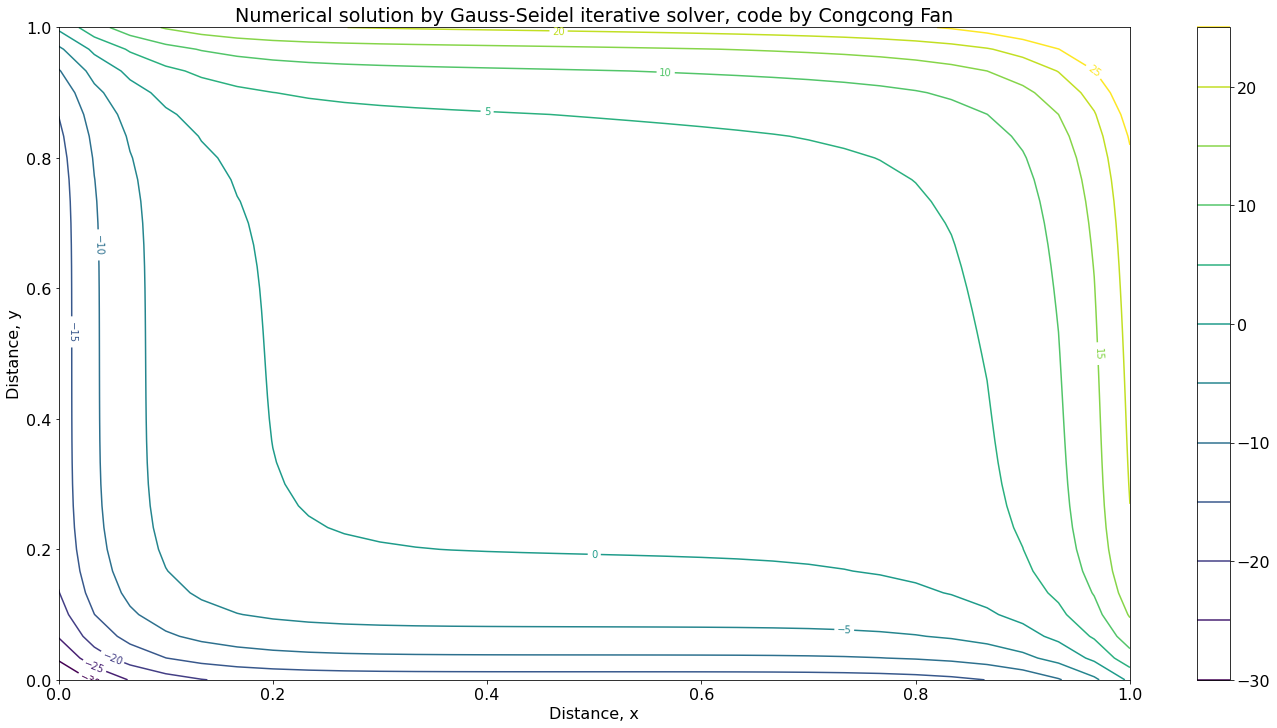

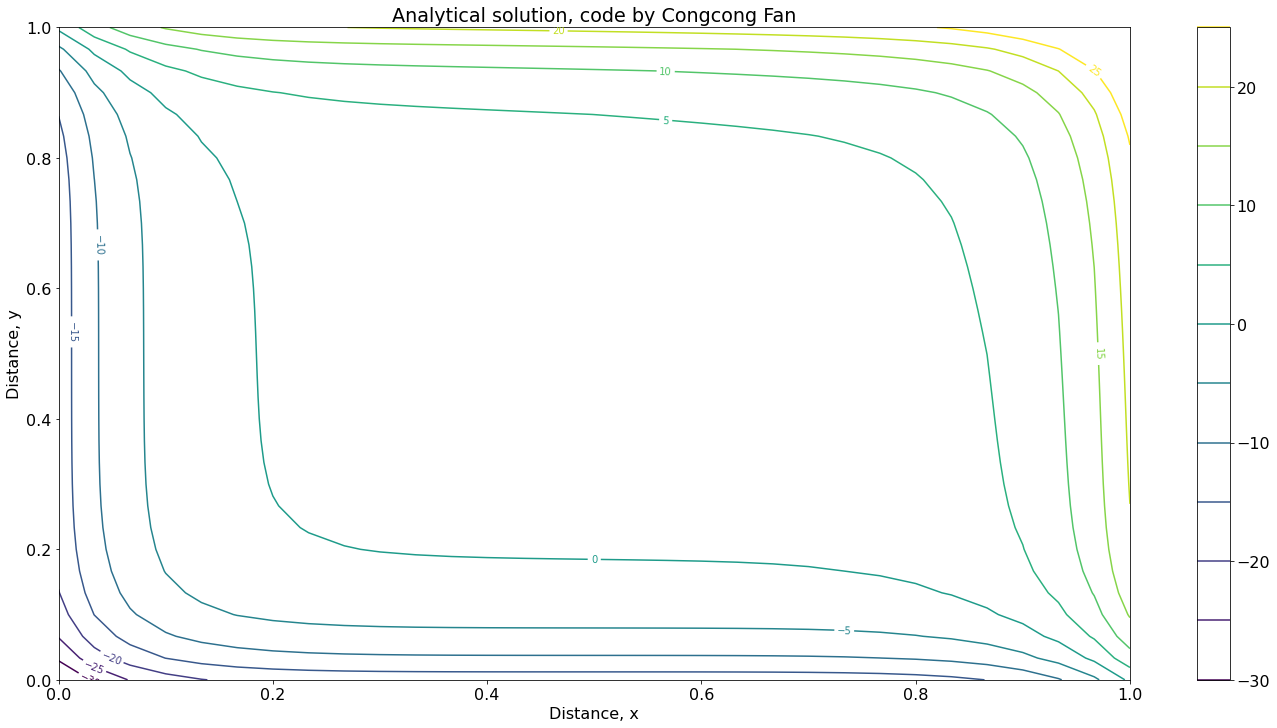

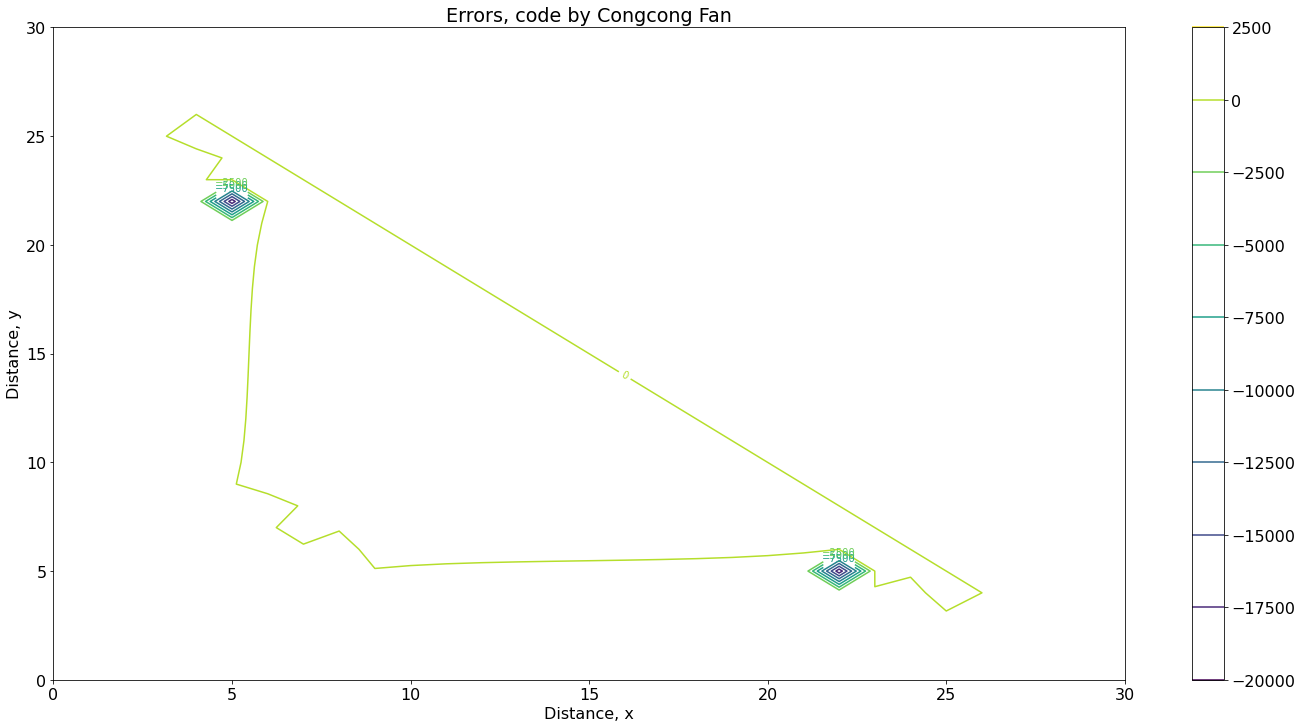

In [10]:
# Analytical solution
x = np.linspace(0,1,N)
y = np.linspace(0,1,N)
phi_A = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        
        phi_A[i,j] = (x[i]-0.5)**2*np.sinh(10*(x[i]-0.5))+(y[j]-0.5)**2*np.sinh(10*(y[j]-0.5))+np.exp(2*x[i]*y[j])

plot_phi(phi, phi_A, N, 'SIP', convert=True)






# Method of Steepest Descent MSD
It is slow but it is a foundation of other iterative solver: CG, CGS
<img src="MSD.png">

In [22]:
start = time.time()
N = 41
M = 41
L = 1  # length
phi = np.zeros((N ** 2))
S = np.zeros((N ** 2))

dx = L / (N - 1)  # Grid size
dy = L / (31 - 1)  # Grid size

tol = 1e-6

aE = 1 / dx ** 2
aW = 1 / dx ** 2
aN = 1 / dy ** 2
aS = 1 / dy ** 2
a0 = -(2 / dx ** 2 + 2 / dy ** 2)

# RHS source terms

for i in range(N):

    for j in range(M):
        x = i * dx
        y = j * dy
        k = (j - 1) * N + i
        S[k] = 2 * np.sinh(10 * (x - 0.5)) + 40 * (x - 0.5) * np.cosh(10 * (x - 0.5)) + 100 * (
                x - 0.5) ** 2 * np.sinh(10 * (x - 0.5)) + 2 * np.sinh(10 * (y - 0.5)) + 40 * (
                          y - 0.5) * np.cosh(10 * (y - 0.5)) + 100 * (y - 0.5) ** 2 * np.sinh(
            10 * (y - 0.5)) + 4 * (x ** 2 + y ** 2) * np.exp(2 * x * y)

## Right BC
i = N - 1
for j in range(1,M-1):
    x = i * dx
    y = j * dy

    k = (j - 1) * N + i
    phi[k] = 0.25 * np.sinh(5) + (y - 0.5) ** 2 * np.sinh(10 * (y - 0.5)) + np.exp(2 * y)
    S[k] = phi[k]


## left BC
i = 0
for j in range(1,M-1):
    x = i * dx
    y = j * dy
    k = (j - 1) * N + i
    phi[k] = 0.25 * np.sinh(-5) + (y - 0.5) ** 2 * np.sinh(10 * (y - 0.5)) + 1
    S[k] = phi[k]

## Bottom BC
j = 0
for i in range(N):
    x = i * dx
    y = j * dy
    k = (j - 1) * N + i
    phi[k] = 0.25 * np.sinh(-5) + (x - 0.5) ** 2 * np.sinh(10 * (x - 0.5)) + 1
    S[k] = phi[k]

## Top BC
j = N - 1
for i in range(N):
    x = i * dx
    y = j * dy
    k = (j - 1) * N + i
    phi[k] = 0.25 * np.sinh(5) + (x - 0.5) ** 2 * np.sinh(10 * (x - 0.5)) + np.exp(2 * x)
    S[k] = phi[k]


aE = 1 / dx ** 2
aW = 1 / dx ** 2
aN = 1 / dy ** 2
aS = 1 / dy ** 2
a0 = -(2 / dx ** 2 + 2 / dy ** 2)
A = matrixA(N)

for _ in tqdm(range(100000)):
    # Step 4
    # Calculate residual
    
    R = S - A@phi

    R2sum = 0 
    N22 = (M-1 -1)*N+N-1
    for k in range(N22):
        R2sum = R2sum + R[k] ** 2
        
    R2 = np.sqrt(R2sum)

    c = np.zeros(N**2)

    for i in range(1, N - 1):
        for j in range(1, M - 1):
            K = (j - 1) * N + i
            B = np.full(K, aS)
            D = np.full(K, aW)
            E = np.full(K, a0)
            F = np.full(K, aE)
            H = np.full(K, aN)

            k = K-1
            
            c[k] = E[k]*R[k] + F[k]*R[k+1] + H[k]*R[k+N] + D[k]*R[k-1] + B[k]*R[k-N]

    rtc = 0

    for k in range(N**2):
        rtc = rtc + R[k]*c[k]
    
    alpha = R2sum/rtc

    phi = phi + alpha*R
    

    if _ % 100 == 0:
        clear_output(True)
        print(f'alpha: {alpha}')
        print("Residual: ", R2)

    if R2 < tol:
        print('Converged! Residual: ',R2, 'Time elapsed: ', time.time()-start)
        break

  8%|▊         | 8308/100000 [02:53<33:58, 44.98it/s]

alpha: -0.00020260597419625927
Residual:  1.1746082230905843e-06


  8%|▊         | 8352/100000 [02:54<31:51, 47.96it/s]

Converged! Residual:  9.999429765107194e-07 Time elapsed:  174.1809470653534


Text(0, 0.5, 'Distance, y')

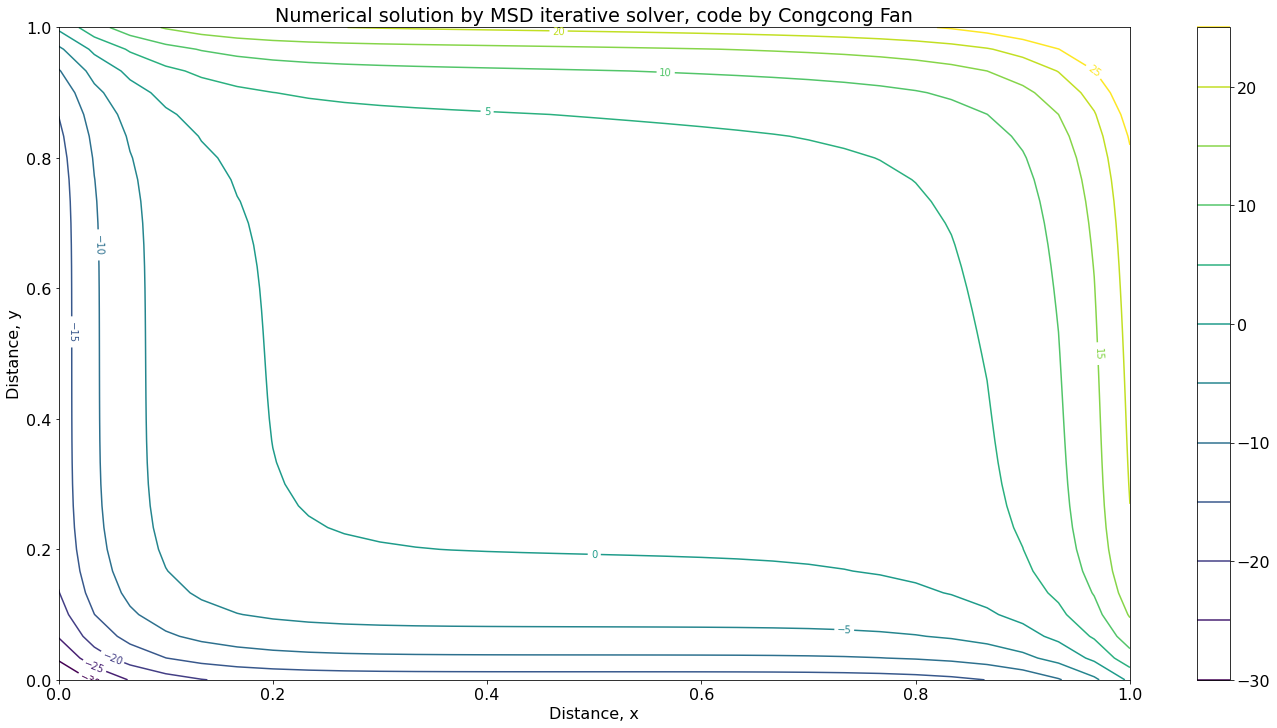

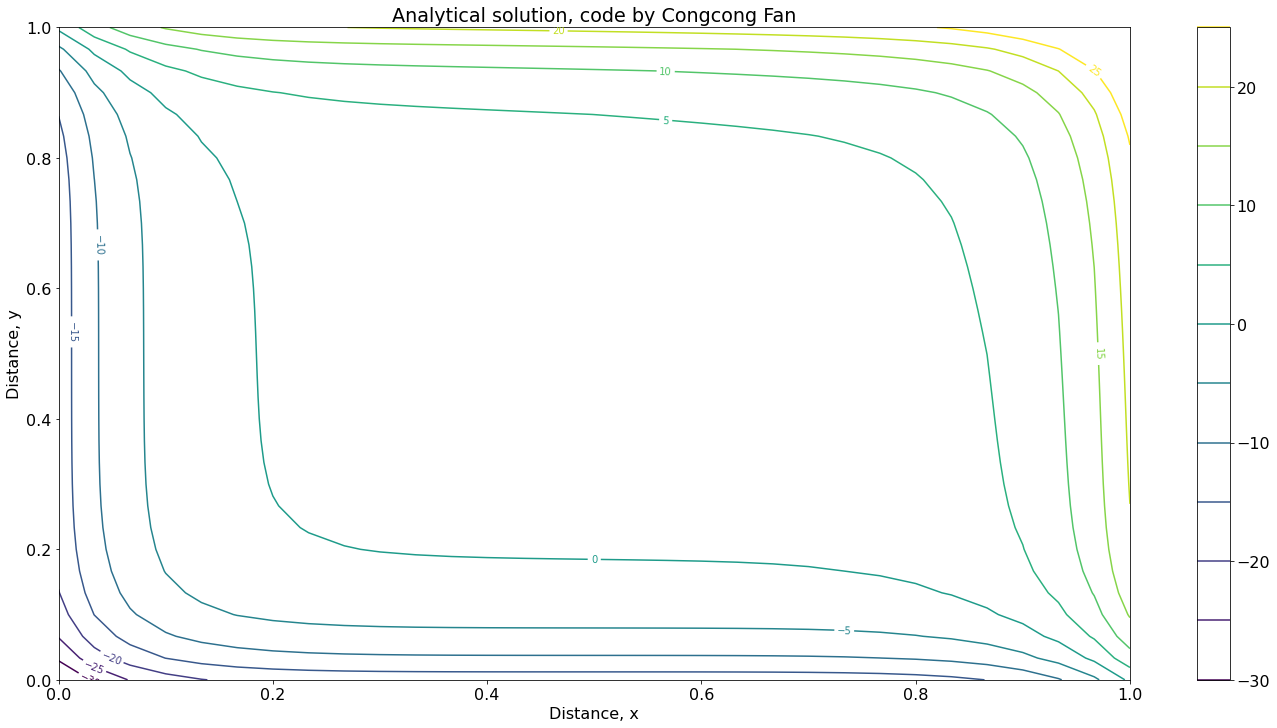

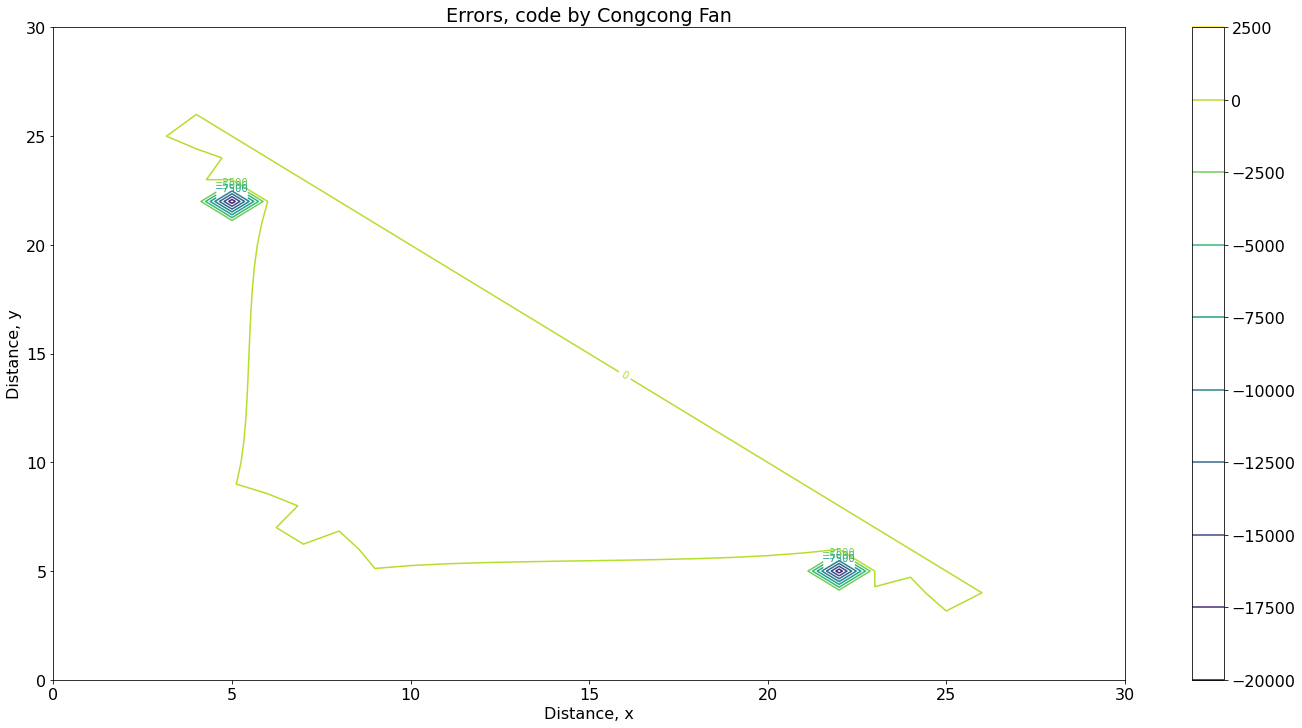

In [20]:
# Analytical solution
x = np.linspace(0,1,N)
y = np.linspace(0,1,N)
phi_A = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        
        phi_A[i,j] = (x[i]-0.5)**2*np.sinh(10*(x[i]-0.5))+(y[j]-0.5)**2*np.sinh(10*(y[j]-0.5))+np.exp(2*x[i]*y[j])

plot_phi(phi, phi_A, N, 'MSD', convert=True)

# CG method

In [52]:
start = time.time()
N = 41
M = 41
L = 1  # length
phi = np.zeros((N*M))
S = np.zeros((N*M))

dx = L / (N - 1)  # Grid size
dy = L / (M - 1)  # Grid size

tol = 1e-6

aE = 1 / dx ** 2
aW = 1 / dx ** 2
aN = 1 / dy ** 2
aS = 1 / dy ** 2
a0 = -(2 / dx ** 2 + 2 / dy ** 2)

# RHS source terms

for i in range(N):

    for j in range(M):
        x = i * dx
        y = j * dy
        k = (j - 1) * N + i
        S[k] = 2 * np.sinh(10 * (x - 0.5)) + 40 * (x - 0.5) * np.cosh(10 * (x - 0.5)) + 100 * (
                x - 0.5) ** 2 * np.sinh(10 * (x - 0.5)) + 2 * np.sinh(10 * (y - 0.5)) + 40 * (
                          y - 0.5) * np.cosh(10 * (y - 0.5)) + 100 * (y - 0.5) ** 2 * np.sinh(
            10 * (y - 0.5)) + 4 * (x ** 2 + y ** 2) * np.exp(2 * x * y)

## Right BC
i = N - 1
for j in range(1,M-1):
    x = i * dx
    y = j * dy

    k = (j - 1) * N + i
    phi[k] = 0.25 * np.sinh(5) + (y - 0.5) ** 2 * np.sinh(10 * (y - 0.5)) + np.exp(2 * y)
    S[k] = phi[k]


## left BC
i = 0
for j in range(1,M-1):
    x = i * dx
    y = j * dy
    k = (j - 1) * N + i
    phi[k] = 0.25 * np.sinh(-5) + (y - 0.5) ** 2 * np.sinh(10 * (y - 0.5)) + 1
    S[k] = phi[k]

## Bottom BC
j = 0
for i in range(N):
    x = i * dx
    y = j * dy
    k = (j - 1) * N + i
    phi[k] = 0.25 * np.sinh(-5) + (x - 0.5) ** 2 * np.sinh(10 * (x - 0.5)) + 1
    S[k] = phi[k]

## Top BC
j = N - 1
for i in range(N):
    x = i * dx
    y = j * dy
    k = (j - 1) * N + i
    phi[k] = 0.25 * np.sinh(5) + (x - 0.5) ** 2 * np.sinh(10 * (x - 0.5)) + np.exp(2 * x)
    S[k] = phi[k]


aE = 1 / dx ** 2
aW = 1 / dx ** 2
aN = 1 / dy ** 2
aS = 1 / dy ** 2
a0 = -(2 / dx ** 2 + 2 / dy ** 2)

A = matrixA(N)

# Initial residual
R = S - A@phi
R2sum_old = 0 
for i in range(N):

    for j in range(M):
        k = (j - 1) * N + i
        R2sum_old = R2sum_old + R[k] ** 2
    
R2_old = np.sqrt(R2sum_old)
# Step 3: Set the initial search direction vector equal to the residual vector
D = R

for _ in tqdm(range(100000)):

    # Compute new alpha
    
    
    alpha_new = R.T @ R / (D.T @ A @ D)


    phi = phi + alpha_new*D
    
    # Compute residual
    R = S - A@phi

    R2sum_new = 0 
    for i in range(N):

        for j in range(M):
            k = (j - 1) * N + i
            R2sum_new = R2sum_new + R[k] ** 2
        
    R2_new = np.sqrt(R2sum_new)

    beta = R2_new**2 / R2_old**2

    # Update search direction vector
    D = R + beta*D
    

    # Update old residual vector
    R2_old = R2_new
    
    if _ % 100 == 0:
        clear_output(True)
        print(f'alpha: {alpha}')
        print("Residual: ", R2_new)

    if R2_new < tol:
        print('Converged! Residual: ',R2_new, 'Time elapsed: ', time.time()-start)
        break

  0%|          | 147/100000 [00:00<03:54, 425.40it/s]

alpha: -0.00020267446883416815
Residual:  0.2648136921260327
Converged! Residual:  7.52793978678539e-07 Time elapsed:  0.4029219150543213


Text(0, 0.5, 'Distance, y')

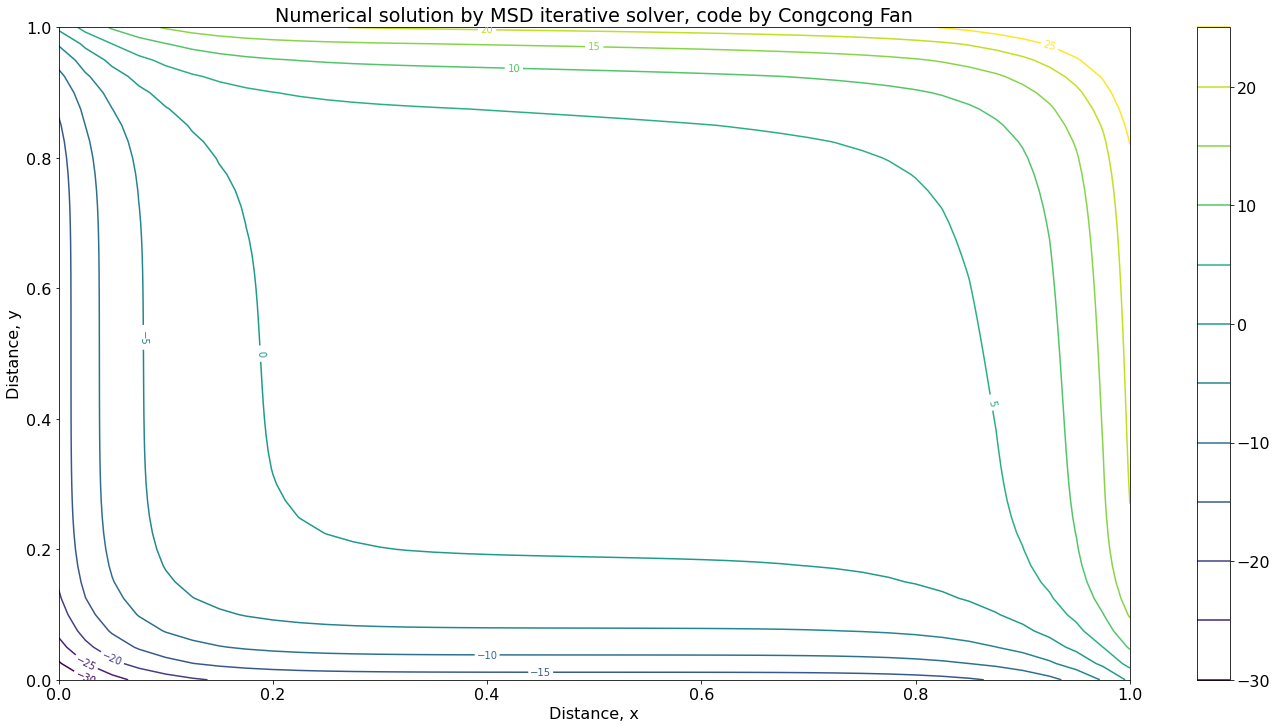

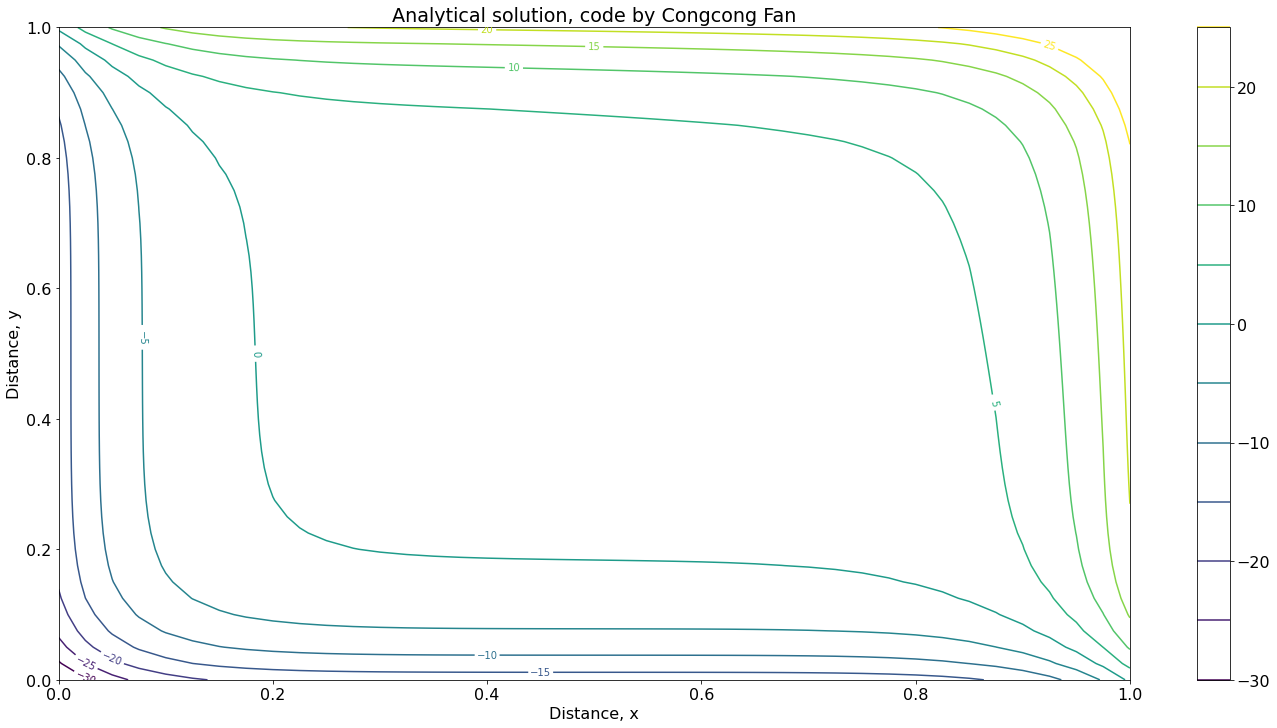

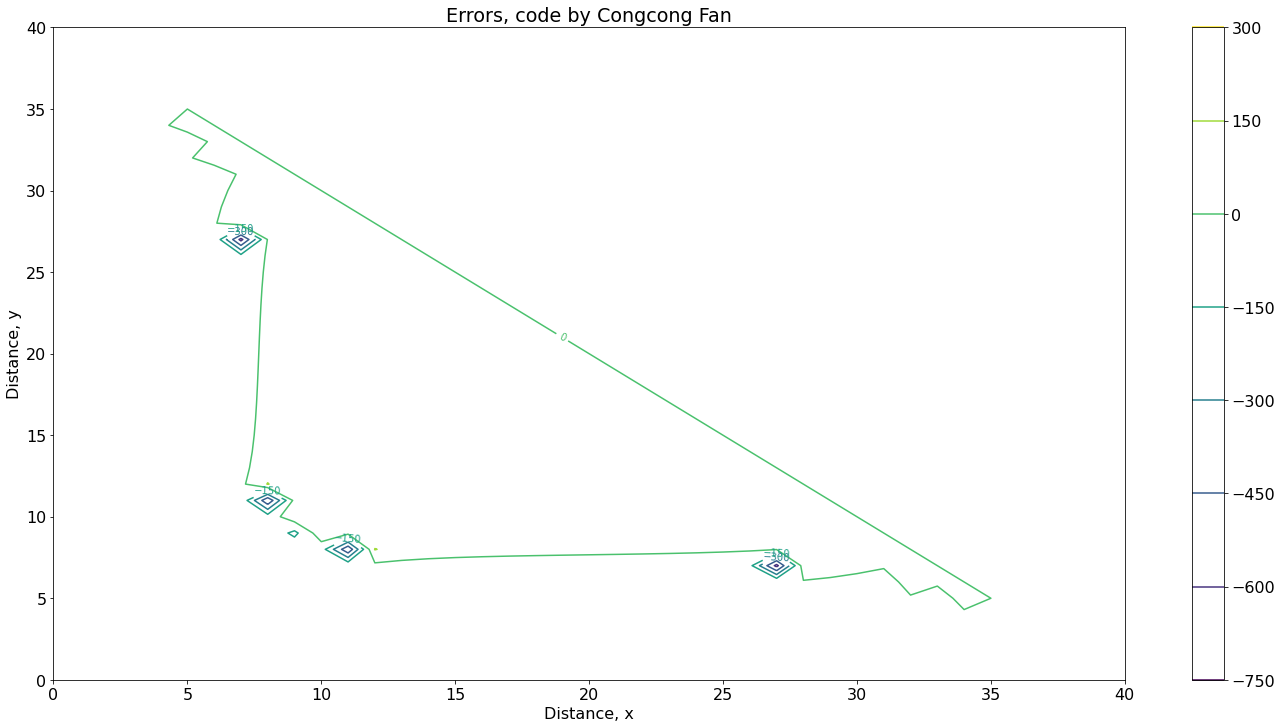

In [65]:
# Analytical solution
x = np.linspace(0,1,N)
y = np.linspace(0,1,N)
phi_A = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        
        phi_A[i,j] = (x[i]-0.5)**2*np.sinh(10*(x[i]-0.5))+(y[j]-0.5)**2*np.sinh(10*(y[j]-0.5))+np.exp(2*x[i]*y[j])

plot_phi(phi, phi_A, N, 'CG', convert=True)

# CGS 

In [59]:
start = time.time()
N = 41
M = 41
L = 1  # length
phi = np.zeros((N*M))
S = np.zeros((N*M))

dx = L / (N - 1)  # Grid size
dy = L / (M - 1)  # Grid size

tol = 1e-6

aE = 1 / dx ** 2
aW = 1 / dx ** 2
aN = 1 / dy ** 2
aS = 1 / dy ** 2
a0 = -(2 / dx ** 2 + 2 / dy ** 2)

# RHS source terms

for i in range(N):

    for j in range(M):
        x = i * dx
        y = j * dy
        k = (j - 1) * N + i
        S[k] = 2 * np.sinh(10 * (x - 0.5)) + 40 * (x - 0.5) * np.cosh(10 * (x - 0.5)) + 100 * (
                x - 0.5) ** 2 * np.sinh(10 * (x - 0.5)) + 2 * np.sinh(10 * (y - 0.5)) + 40 * (
                          y - 0.5) * np.cosh(10 * (y - 0.5)) + 100 * (y - 0.5) ** 2 * np.sinh(
            10 * (y - 0.5)) + 4 * (x ** 2 + y ** 2) * np.exp(2 * x * y)

## Right BC
i = N - 1
for j in range(1,M-1):
    x = i * dx
    y = j * dy

    k = (j - 1) * N + i
    phi[k] = 0.25 * np.sinh(5) + (y - 0.5) ** 2 * np.sinh(10 * (y - 0.5)) + np.exp(2 * y)
    S[k] = phi[k]


## left BC
i = 0
for j in range(1,M-1):
    x = i * dx
    y = j * dy
    k = (j - 1) * N + i
    phi[k] = 0.25 * np.sinh(-5) + (y - 0.5) ** 2 * np.sinh(10 * (y - 0.5)) + 1
    S[k] = phi[k]

## Bottom BC
j = 0
for i in range(N):
    x = i * dx
    y = j * dy
    k = (j - 1) * N + i
    phi[k] = 0.25 * np.sinh(-5) + (x - 0.5) ** 2 * np.sinh(10 * (x - 0.5)) + 1
    S[k] = phi[k]

## Top BC
j = N - 1
for i in range(N):
    x = i * dx
    y = j * dy
    k = (j - 1) * N + i
    phi[k] = 0.25 * np.sinh(5) + (x - 0.5) ** 2 * np.sinh(10 * (x - 0.5)) + np.exp(2 * x)
    S[k] = phi[k]


aE = 1 / dx ** 2
aW = 1 / dx ** 2
aN = 1 / dy ** 2
aS = 1 / dy ** 2
a0 = -(2 / dx ** 2 + 2 / dy ** 2)

A = matrixA(N)

# Initial residual
R0 = S - A@phi
R2sum_old = 0 
for i in range(N):

    for j in range(M):
        k = (j - 1) * N + i
        R2sum_old = R2sum_old + R0[k] ** 2
    
R2_old = np.sqrt(R2sum_old)
# Step 3: Set the initial search direction vector equal to the residual vector
D = R0
D_conjugate = R0
R_old = R0
for _ in tqdm(range(100000)):

    # Compute new alpha
    
    
    alpha = R0.T @ R_old / (R0.T @ A @ D)

    G = D_conjugate - alpha * A @ D


    phi = phi + alpha*(D_conjugate + G)
    
    # Compute residual
    R_new = S - A@phi

    R2sum_new = 0 
    for i in range(N):

        for j in range(M):
            k = (j - 1) * N + i
            R2sum_new = R2sum_new + R_new[k] ** 2
        
    R2_new = np.sqrt(R2sum_new)
    beta = R0.T @ R_new / (R0.T @ R_old)

    # Update search direction vector
    D_conjugate = R_new + beta*G
    

    # Update old residual vector
    R2_old = R2_new
    R_old = R_new

    # Update search direction vector
    D = D_conjugate + beta* (G + beta*D)
    
    if _ % 100 == 0:
        clear_output(True)
        print(f'alpha: {alpha}')
        print("Residual: ", R2_new)

    if R2_new < tol:
        print('Converged! Residual: ',R2_new, 'Time elapsed: ', time.time()-start)
        break

  0%|          | 108/100000 [00:00<13:08, 126.64it/s]

alpha: -0.0002651030327862317
Residual:  0.00022638759796188155
Converged! Residual:  7.426820802235055e-07 Time elapsed:  0.8729720115661621


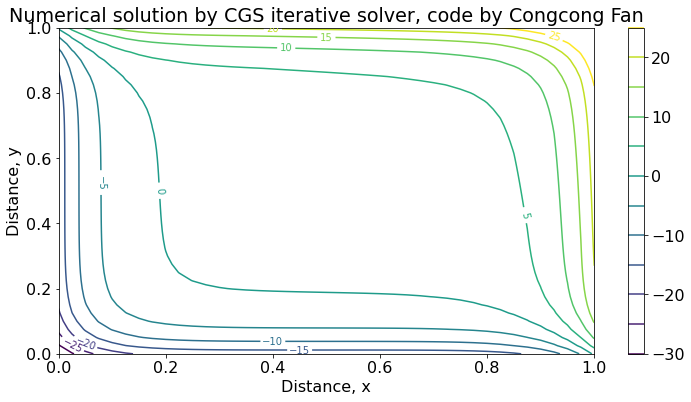

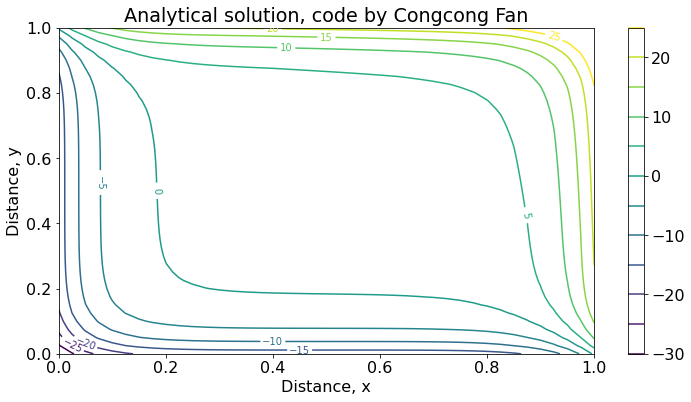

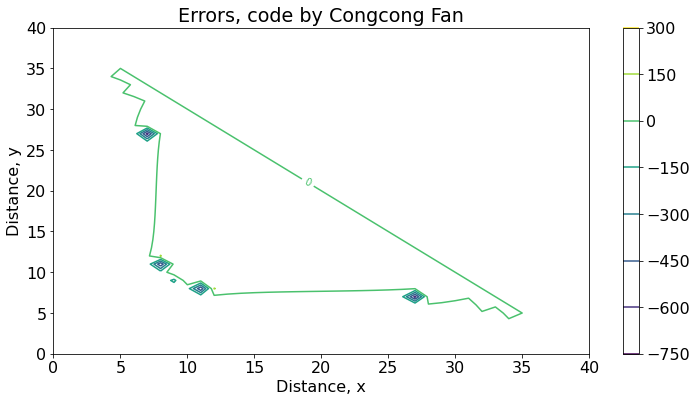

In [66]:
# Analytical solution
x = np.linspace(0,1,N)
y = np.linspace(0,1,N)
phi_A = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        
        phi_A[i,j] = (x[i]-0.5)**2*np.sinh(10*(x[i]-0.5))+(y[j]-0.5)**2*np.sinh(10*(y[j]-0.5))+np.exp(2*x[i]*y[j])

plot_phi(phi, phi_A, N, 'CGS', convert=True)